In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# setting up the chart size and background
plt.rcParams['figure.figsize'] = (12, 8)
plt.style.use('fivethirtyeight')

# for Interactive Shells
from IPython.display import display

In [4]:
df = pd.read_csv('adult.csv')

<AxesSubplot:>

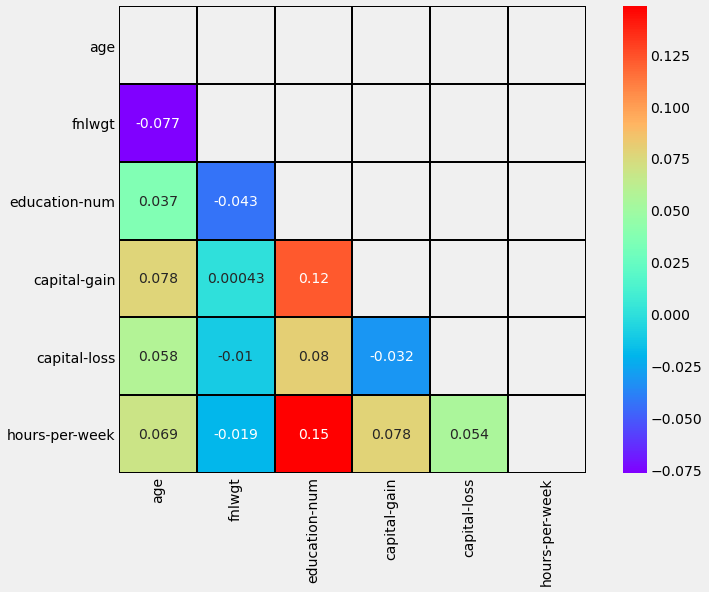

In [5]:
#1. Correlation between numberic variables
plt.figure()

matrix = np.triu(df.corr())   #Python NumPy triu() is an inbuilt function that is used to return a copy of the array 
                                #matrix with an element of the upper part of the triangle with respect to k.
sns.heatmap(df.corr(),cmap='rainbow',square=True,linecolor='black',linewidths=1, annot = True, mask=matrix)

# from below we can see that There is no strong positive or negative correlation between these variables.
# Thus we are unlikely to run into any multi-collinearity issues in the model

In [6]:
#lets split data into catagroical and numerical feature so we can undersatnd data insight better


cols_df = pd.DataFrame(df.dtypes)
num_cols = list(cols_df[cols_df[0]=='int64'].index)
cat_cols = list(cols_df[cols_df[0]=='object'].index)[:-1] #excluding target column of income 
print('Numeric variables includes:','\n',num_cols)
print('\n')
print('Categorical variables includes','\n',cat_cols)

Numeric variables includes: 
 ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


Categorical variables includes 
 ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'country']


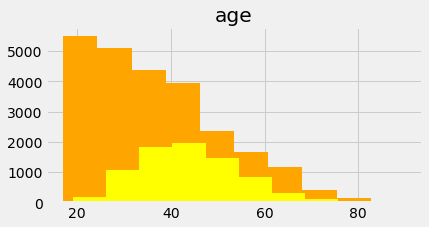

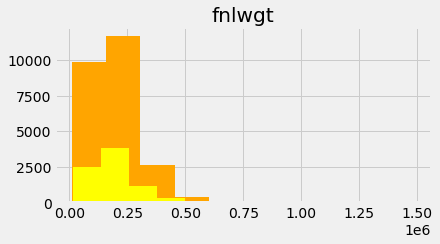

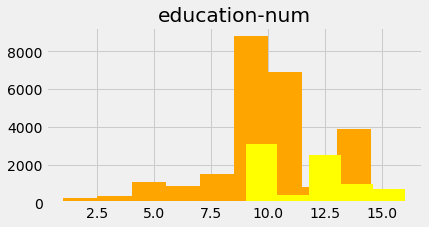

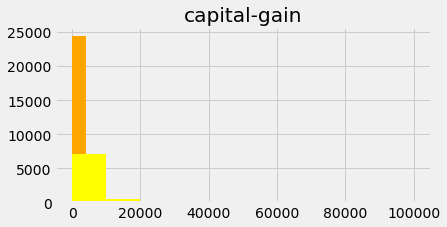

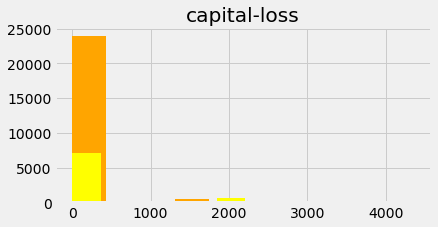

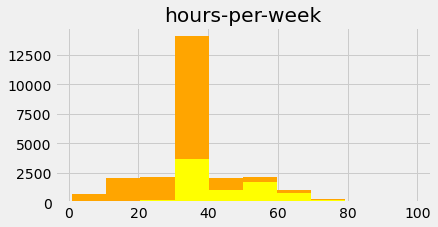

In [10]:
#histogram for each feature

for i in num_cols:
    plt.figure(figsize=(6,3))
    df[df['salary']==' <=50K'][i].hist(color='orange')
    df[df['salary']==' >50K'][i].hist(color='yellow')
    plt.title(i)
    plt.show()
    
#==>>Histograms for each variable:

#->Younger population falls under the lower income category whereas the age distribution for above 50K income is normally distributed


#->The mean observation of education level is higher for the above 50k income group with most observations falling above education level of 9


#->Capital gain and capital loss have largely zero values hence we will exclude it from our feature matrix


#->Also, fnlwgt by definition is a control parameter kept in the census data. We may need to exclude it later from our model depending on it's impact on performance


#->Majority of lower income group individuals work for less than 40 hours whereas the higher income group individuals have a more right skewed distribution of working hours


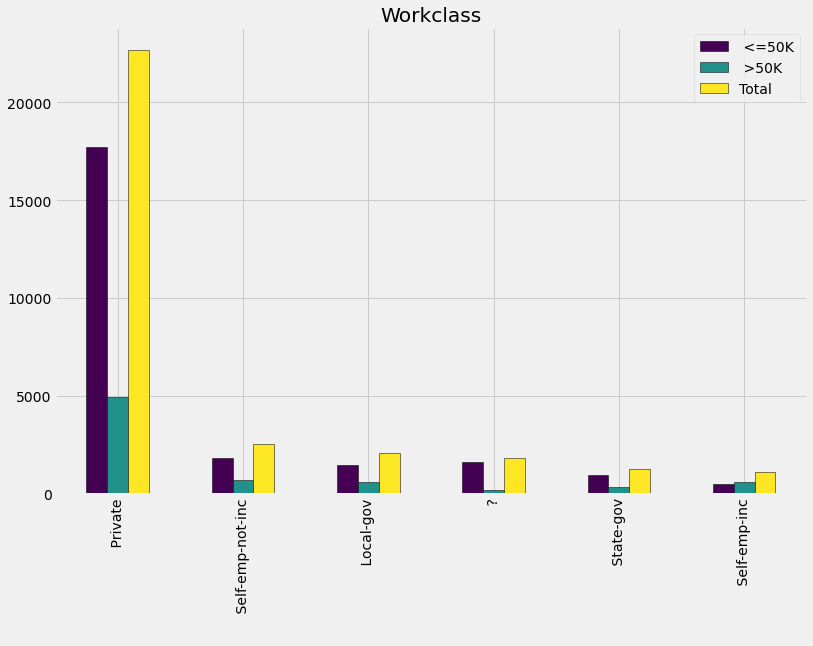

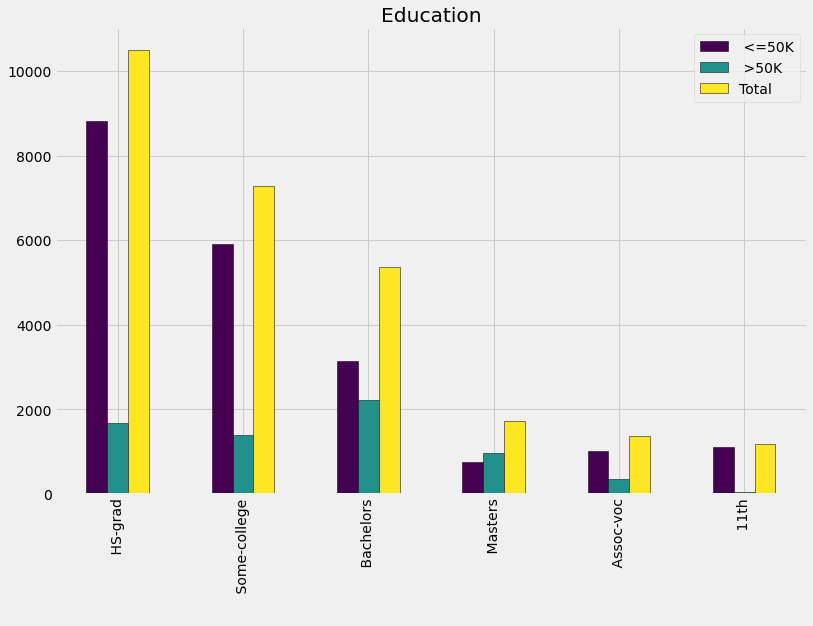

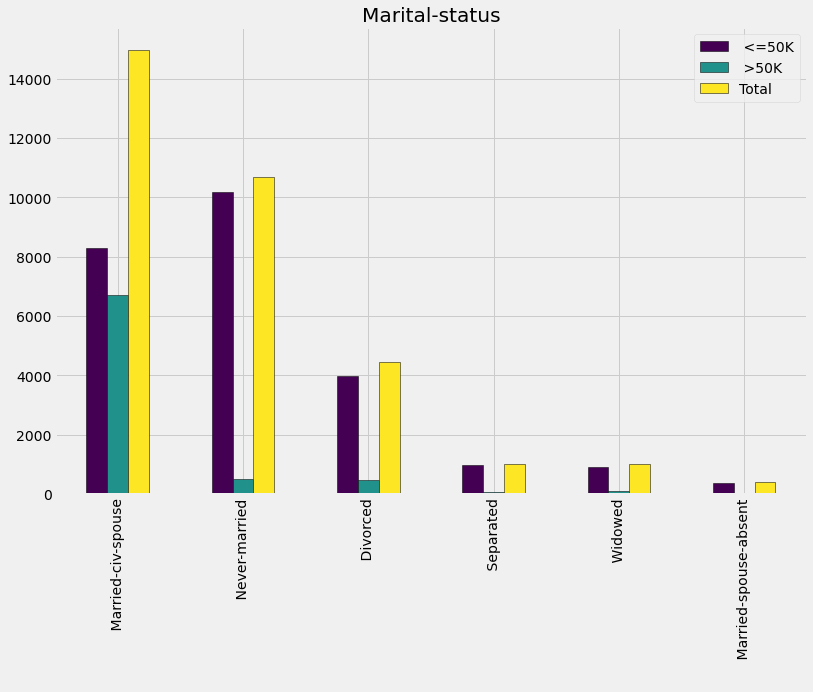

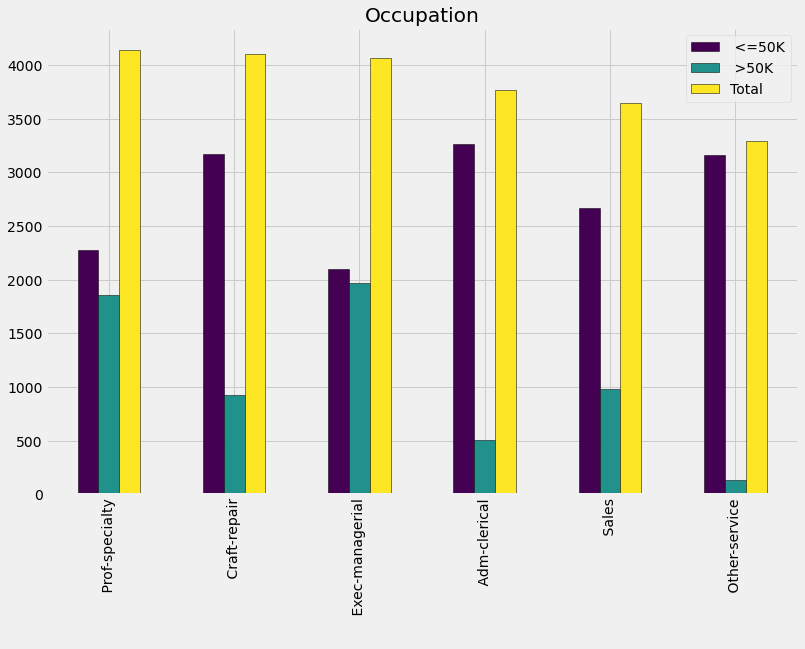

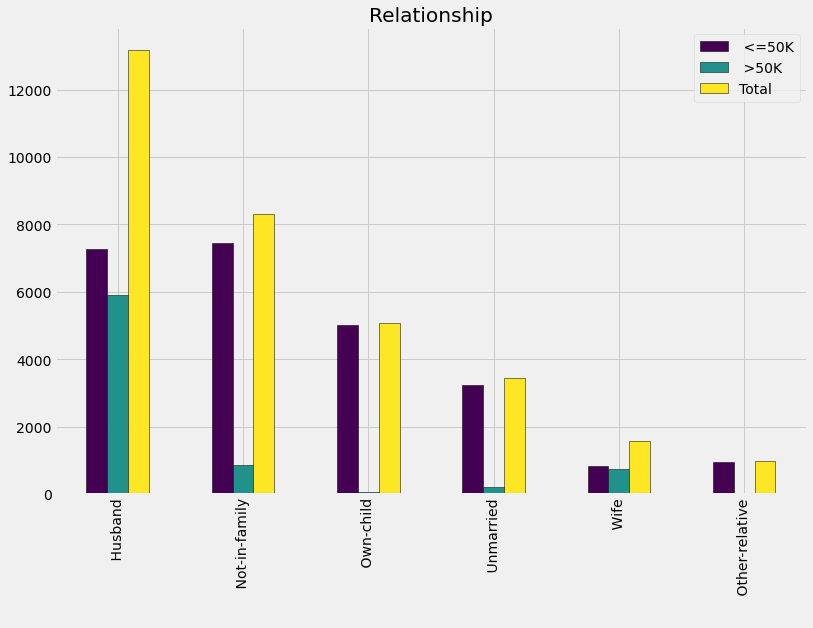

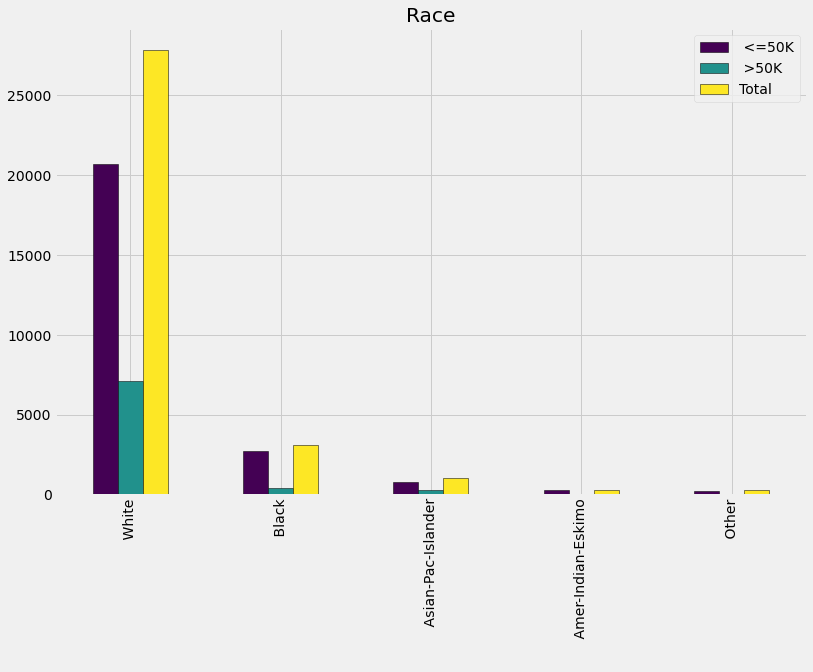

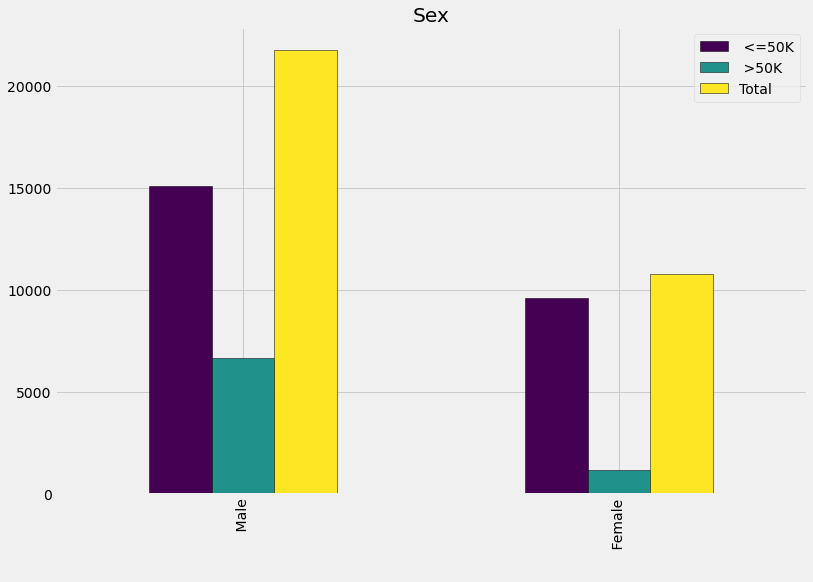

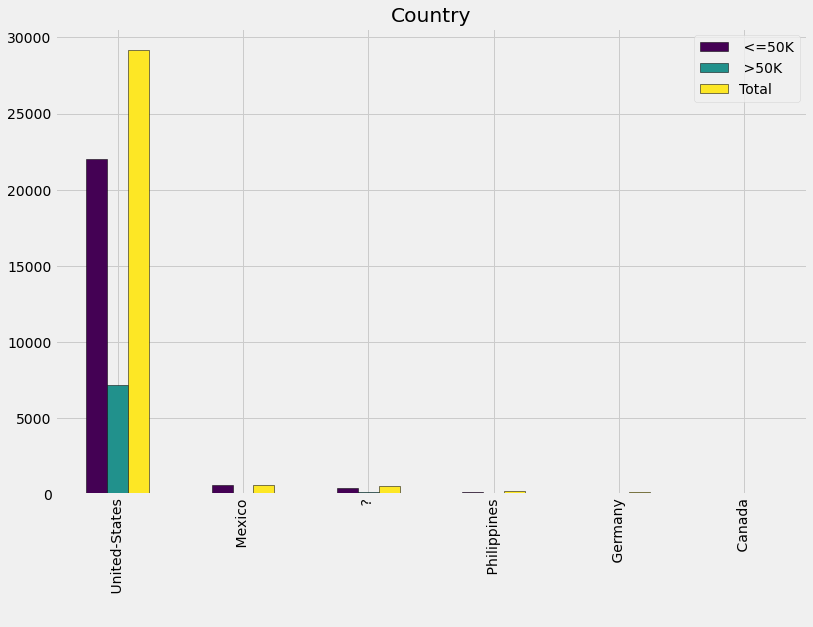

In [29]:
#lets take a quick look at all catgroican feature with respesct 
#to the label i.e., salary >50k or salary <= 50k 

#Categorical Variables
for i in cat_cols:
    ct = pd.crosstab(df[i],df['salary'],margins=True, margins_name="Total")
    ct.drop(labels='Total',axis=0,inplace=True) #Removing subtotal row 
    ct.sort_values(by='Total',ascending=False,inplace=True) #Sorting based on total column
    #Selecting only top 6 categories for plotting
    ct.iloc[:6,:].plot(kind='bar',colormap='viridis',edgecolor='black')  
    plt.xlabel(' ')
    plt.title(str(i).capitalize())
    plt.legend(loc=1)
    plt.show()


from above plots

• Count plot observations: We are only looking at top 6 categories for each variable on different salary levels and total level (for benchmarking our observations)

•Leading attributes of <=50K income group:
->No clear distinction on the workclass since both groups are majorly employed in the private sector

->High school or some college graduates

->Unmarried (could be partly due to younger age)

->Common occupation includes craft/repair, admin-clerical and other services (may be unorganised in nature)

->Equal proportion of individuals who are not in a family setting and are husbands

->Race distribution is similar to overall population distribution for this group

->Gender and native country follow a pattern similar to the entire population for both the groups (i.e. largely males from USA itself)

•Leading attributes of >50K income group:
->Largely employed in the private sector

->More frequenct bachlor degree holders (in line with our observation on higher education level)

->Significant proportion is married and living with a spouse

->These individuals hold highly specialised positions in the workforce like executive management and prof-specialty (which partly explain the higher income)

->Most play an active family role as a husband or wife

->Whites dominate this income group, however it should be noted this is also the general population distribution

<AxesSubplot:xlabel='count', ylabel='marital-status'>

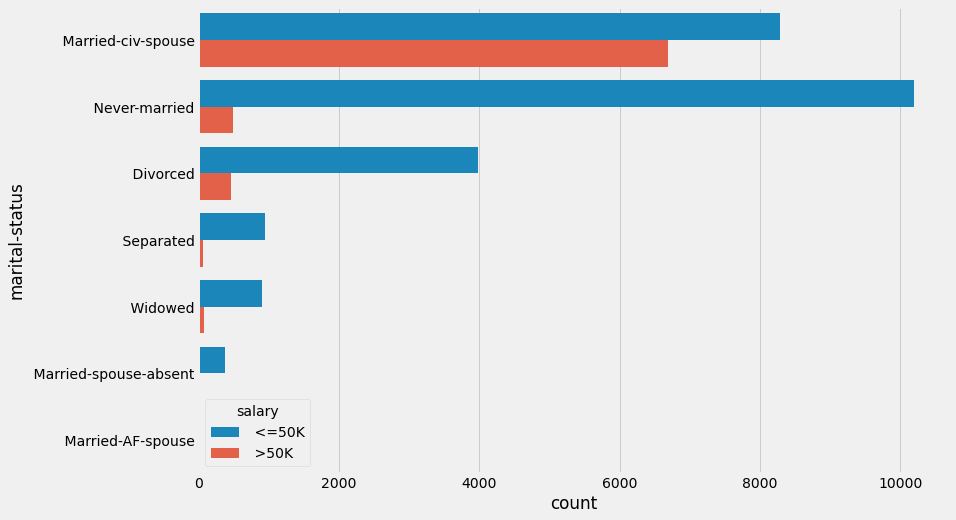

In [12]:
sns.countplot(y=df['marital-status'], hue=df['salary'], order = df['marital-status'].value_counts().index)

We see that most of the married people are earning more than 50k as compared to other classes

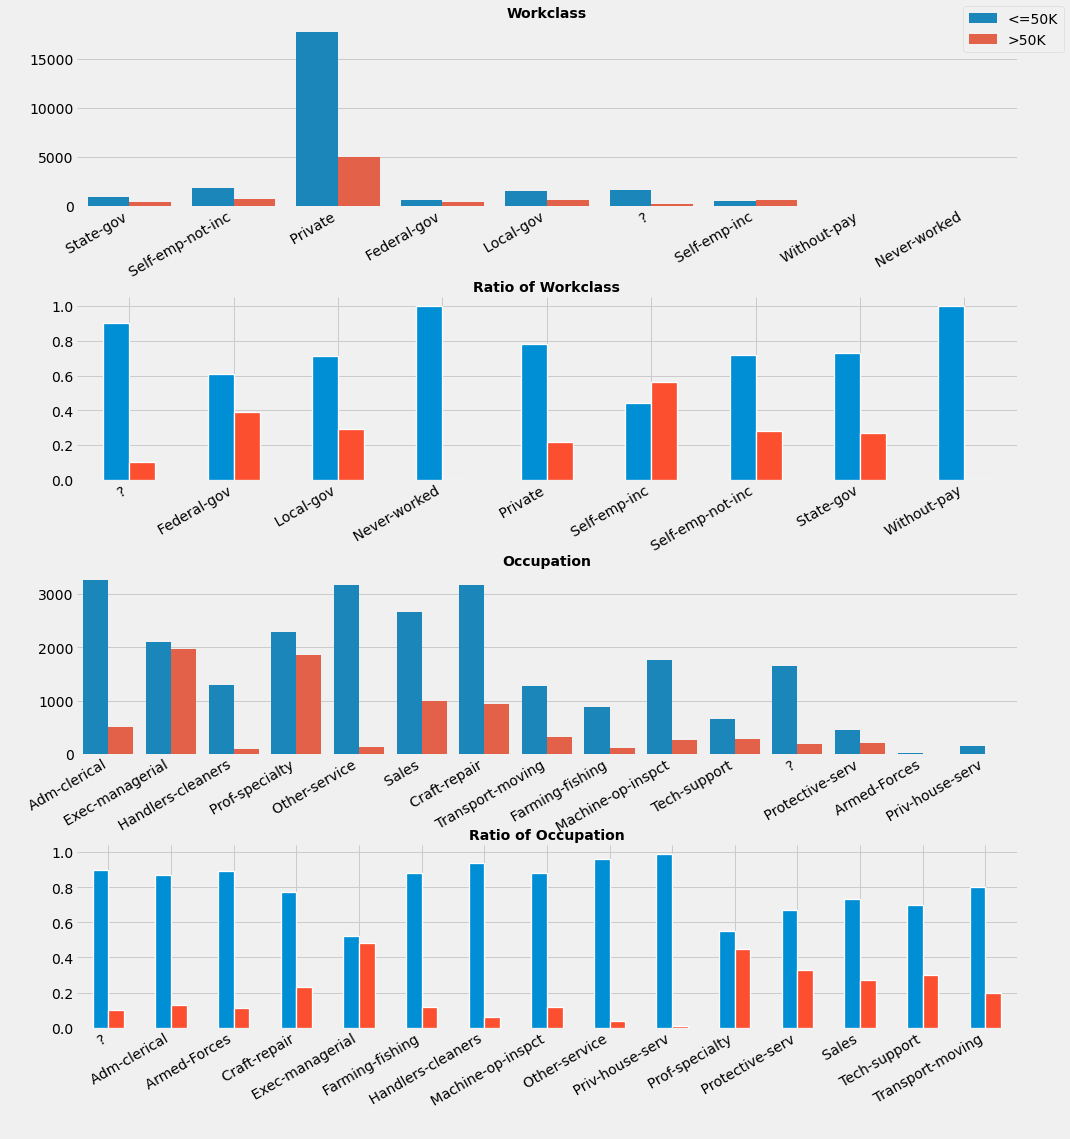

In [13]:
fig = plt.figure(figsize=(15,15))
ax1= fig.add_subplot(411)
ax2= fig.add_subplot(412)
ax3= fig.add_subplot(413)
ax4= fig.add_subplot(414)

data_workclass = round(pd.crosstab(df.workclass, df.salary).div(pd.crosstab(df.workclass, df.salary).apply(sum,1),0),2)
data_occupation = round(pd.crosstab(df.occupation, df.salary).div(pd.crosstab(df.occupation, df.salary).apply(sum,1),0),2)

## Setting space between both subplots
plt.subplots_adjust(left=None,
                    bottom=None, 
                    right=None, 
                    top=1, 
                    wspace=None, 
                    hspace=0.5)

## Grapphing
sns.countplot(x='workclass', hue='salary', data= df, ax=ax1,)
data_workclass.plot.bar(ax=ax2, edgecolor='w',linewidth=1.3)

sns.countplot(x='occupation', hue='salary', data= df, ax=ax3)
data_occupation.plot.bar(ax=ax4, edgecolor='w',linewidth=1.3)

## Removing lines from the graph
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)
ax4.spines['left'].set_visible(False)
ax4.spines['bottom'].set_visible(False)


## Removing subplots legends
ax1.get_legend().remove()
ax2.get_legend().remove()
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30, ha='right')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=30, ha='right')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=30, ha='right')
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=30, ha='right')
ax3.get_legend().remove()
ax4.get_legend().remove()



## Title
ax1.set_title("Workclass", loc='center',fontweight='bold',fontsize=14)
ax3.set_title("Occupation", loc='center',fontweight='bold',fontsize=14)
ax2.set_title("Ratio of Workclass", loc='center',fontweight='bold',fontsize=14)
ax4.set_title("Ratio of Occupation", loc='center',fontweight='bold',fontsize=14)
ax1.set_xlabel(" ")
ax1.set_ylabel(' ')
ax2.set_xlabel(" ")
ax2.set_ylabel(' ')
ax3.set_xlabel(" ")
ax3.set_ylabel(' ')
ax4.set_xlabel(" ")
ax4.set_ylabel(' ')


## Legend
line_labels = ["<=50K", ">50K"]
fig.legend(
    loc="upper right",
    labels=line_labels)

Here we can see interesting things about our data:

•Workclass: 
From our data Private is the largest category by number. If we look at the ratio, self-empl-inc has 
almost the same amount of people who earn more than 50K and less than 50K, and is the only category where more people earn
above 50K.

•Occupation:
We can see that Adm-Clerical and Machine-op-Inspect are the most frequent jobs. In terms of income, we 
can say that Exec-Managerical has the highest rate of >50K, followed by Armed Forces. The job with the lowest >50K
is Priv-house-serv."""

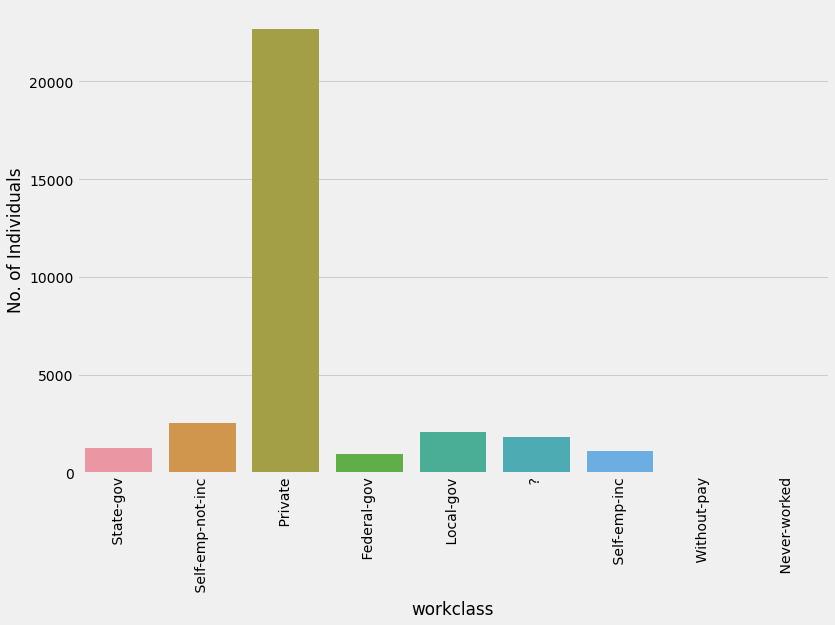

In [17]:
#workclass
sns.countplot(x='workclass',data=df)
plt.ylabel('No. of Individuals')
plt.xticks(rotation=90);

There are 9 workclass in total including Never worked and one 
unknown category(?).Most individuals work in private sector and
there are very few who have never worked or work without pay. 
There are 3 categories of govt job provided state, federal and 
local among which no. of people working in the local govt is 
highest.

Text(0, 0.5, 'No. of Individuals')

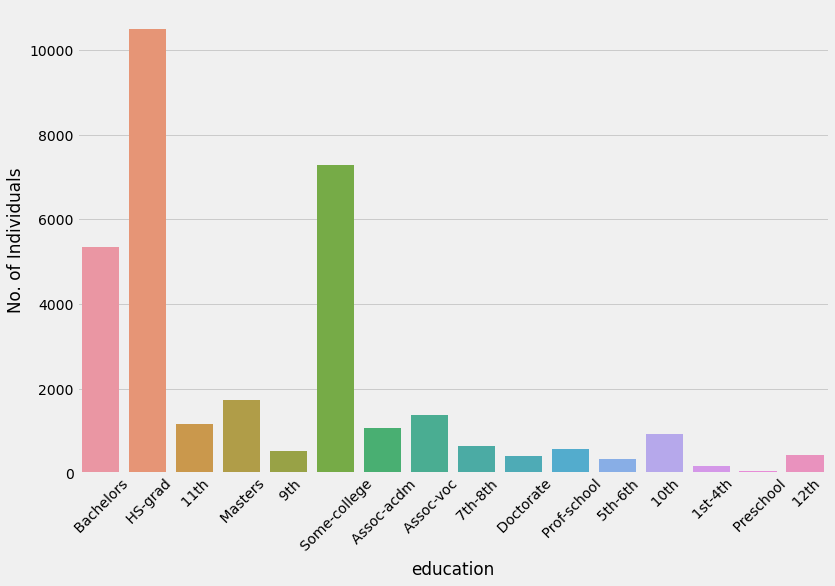

In [18]:
sns.countplot(x='education',data=df)
plt.xticks(rotation=45)
plt.ylabel('No. of Individuals')

Most of the people are high school graduate. There are few who 
have done masters and doctorate. The no. of people who 
went through just the preschool or 1st to 4th is the least.

Text(0, 0.5, 'No. of Individual')

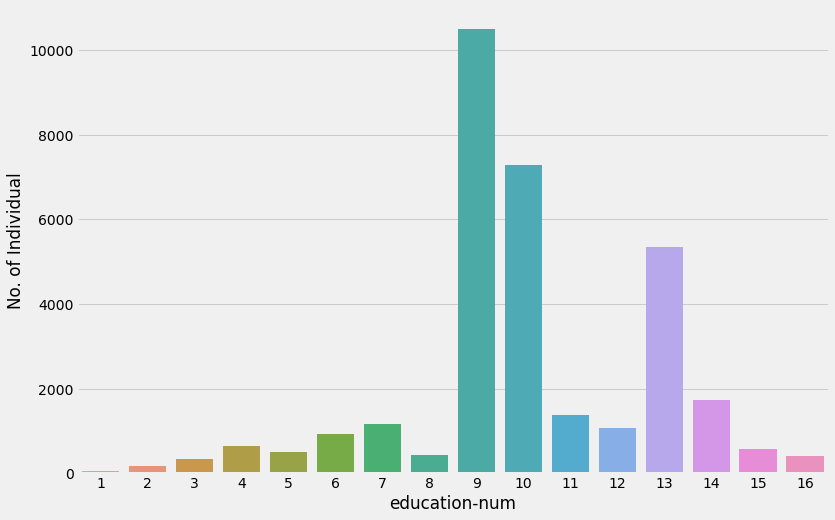

In [19]:
sns.countplot(x='education-num', data=df)
plt.ylabel('No. of Individual')

Majority of individuals lie in the 9th 10th category of education
no. which is a liitle higher than the median education number. 
People with least and highest educations are very few.

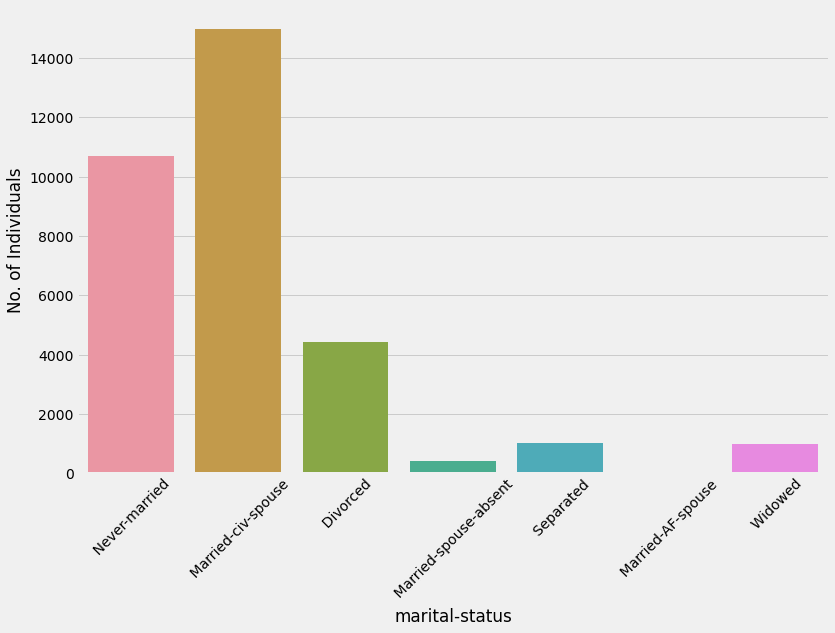

In [22]:
sns.countplot(x='marital-status',data=df)
plt.ylabel('No. of Individuals')
plt.xticks(rotation=45);

Majority of people are married to a civialian spouse or Never
married. Least people are married to armed forces. From the 
above maritial status data we can see that there 
are less young people in the workforce as compared to young ones.

Text(0, 0.5, 'No. of Individuals')

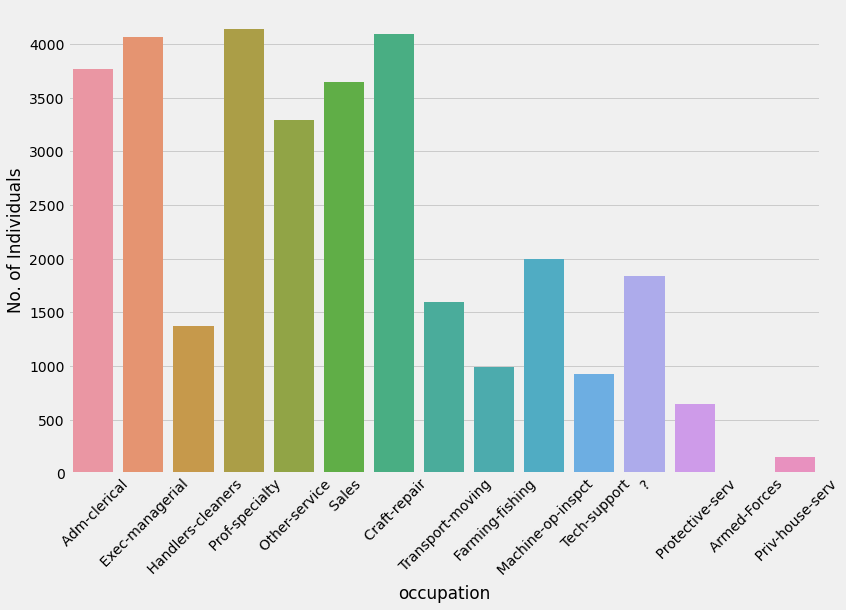

In [24]:
sns.countplot(x='occupation',data=df)
plt.xticks(rotation=45)
plt.ylabel('No. of Individuals')

We can observe over here that prof-speciality has the highest 
number for people than any other occupation. followed by craft
repair persons. Minimum occupation category is the armed forces
with only9 people in it. There is an unknown category of 
occupation too.

Text(0, 0.5, 'No. of Individuals')

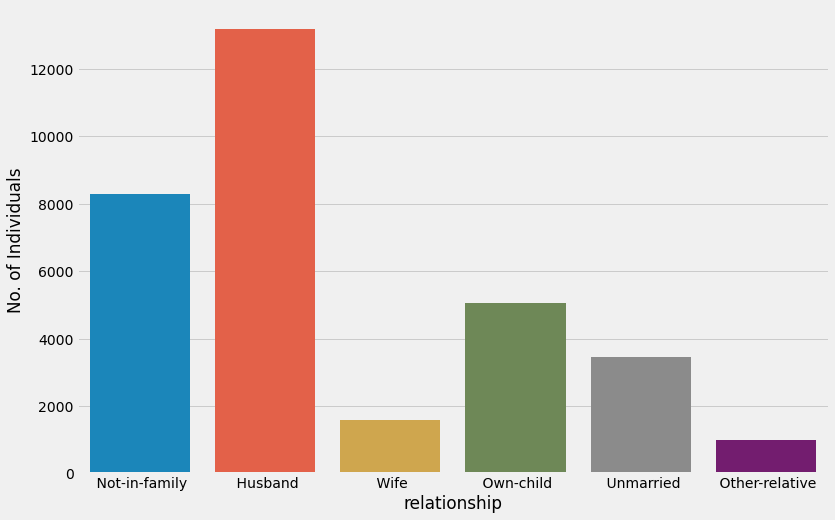

In [25]:
sns.countplot(x='relationship',data=df)
plt.ylabel('No. of Individuals')

There are much more husband working than their wives. 
There are 25% individuals working who 
fall in not in family category.

Text(0, 0.5, 'No. of Individuals')

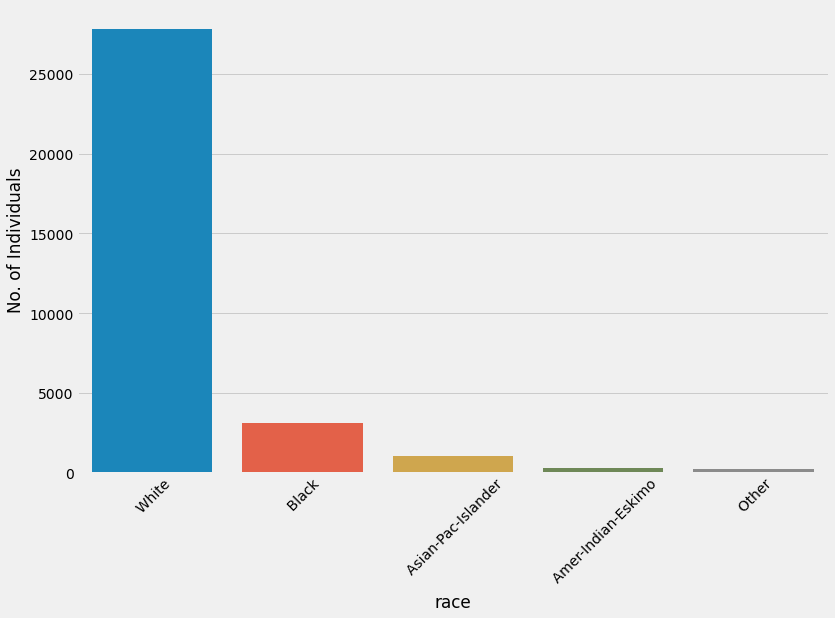

In [26]:
sns.countplot(x='race',data=df)
plt.xticks(rotation=45)
plt.ylabel('No. of Individuals')

Since this is from european countries, most of the individuals
working here are white. There is also an other category where
minory races are present.

Text(0, 0.5, 'No. of Individuals')

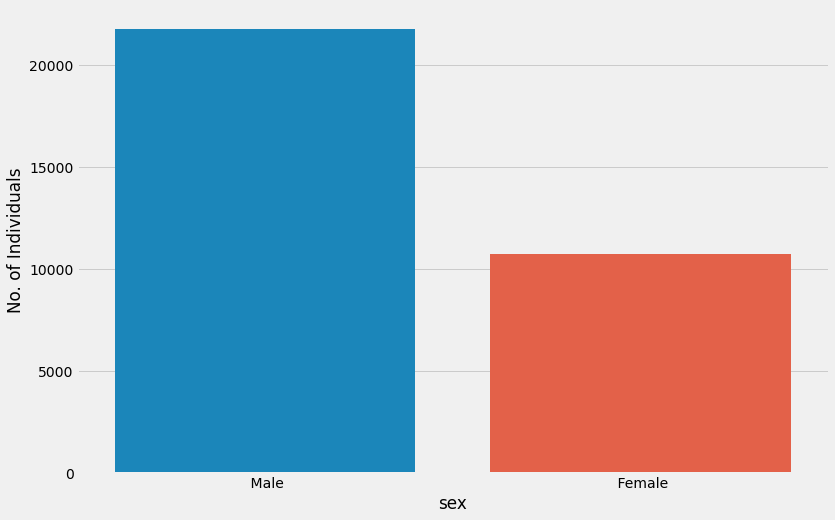

In [27]:
sns.countplot(x='sex',data=df)
plt.ylabel('No. of Individuals')

There is more than double the number of men working than the no. of women.

Text(0, 0.5, 'No. of Individuals')

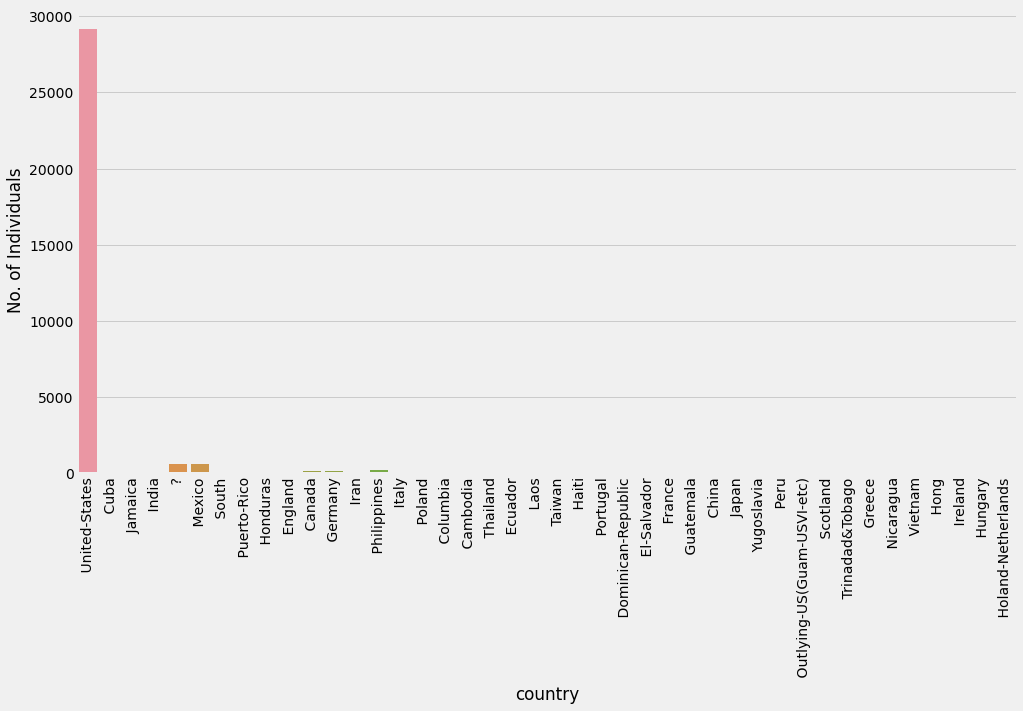

In [28]:
plt.figure(figsize=(15,8))
sns.countplot(x='country',data=df)
plt.xticks(rotation=90)
plt.ylabel('No. of Individuals')

Majority of the people working belong from U.S. whereas there
are people who come to U.S. from their own countries but there 
no. is very low. Second highest no. of people belong from 
Mexico as it is a neighboring country.

**Bivariate analysis**

Minimum 17
Maximum 90


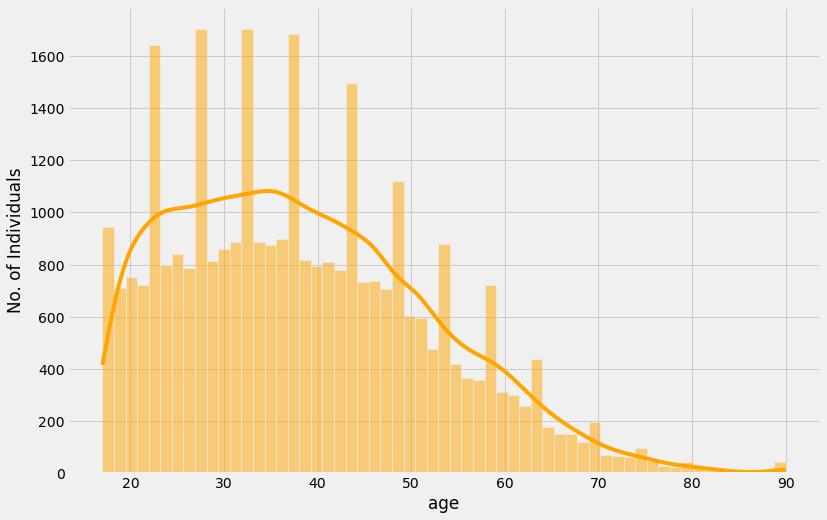

In [31]:
#numeric column
sns.histplot(df['age'],kde=True,color='orange')
plt.ylabel('No. of Individuals')
print('Minimum',df['age'].min())
print('Maximum',df['age'].max())

Minimum age of a working individual is 17 and highest is 90 which 
is way far retirement, but majority of the people working are in
the age 25 to 45. Data is skewed to the right side.

Minimum 12285
Maximum 1484705


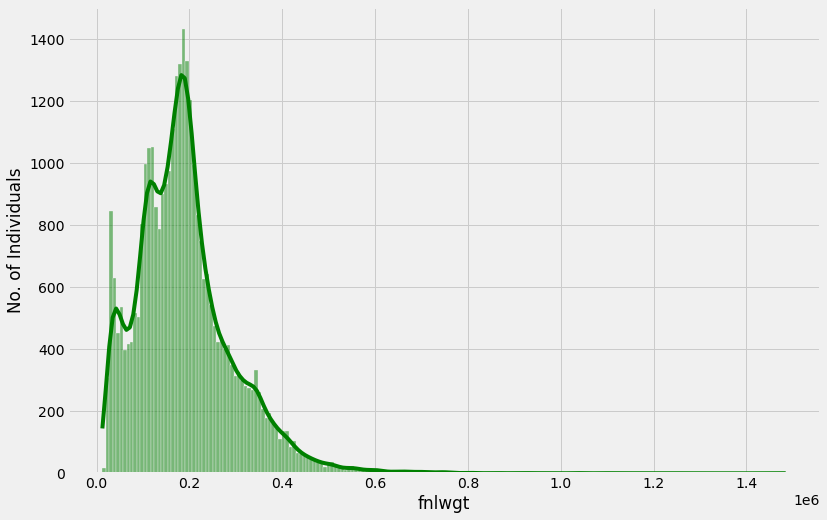

In [32]:
#final wieght
sns.histplot(df['fnlwgt'],kde=True,color='green')
plt.ylabel('No. of Individuals')
print('Minimum',df['fnlwgt'].min())
print('Maximum',df['fnlwgt'].max())

It is assigned by combination of features and has the peak wt as 0.2*1e6. 
Data does not follow normal distribution and data is rigt skewed.

Minimum 0
Maximum 99999


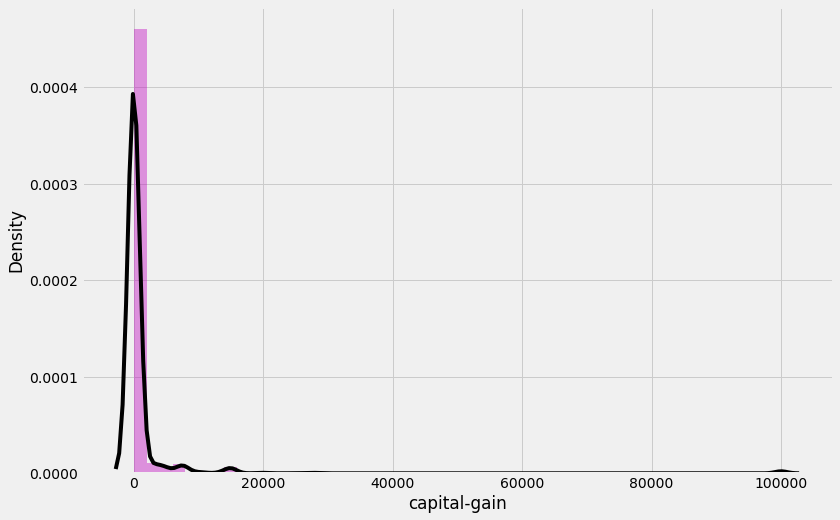

In [33]:
#capital gain
sns.distplot(df['capital-gain'],color='m', kde_kws={"color": "k"})
print('Minimum',df['capital-gain'].min())
print('Maximum',df['capital-gain'].max())

Minimum capital gain is 0 while the range goes on to 99999 but 
most of the people are with the gain of 1000. Data is highly 
skewed with a very long tail due to presence of large outliers.
Outliers here are very few people belonging to elite class who 
have very large capital gains.

Minimum 0
Maximum 4356


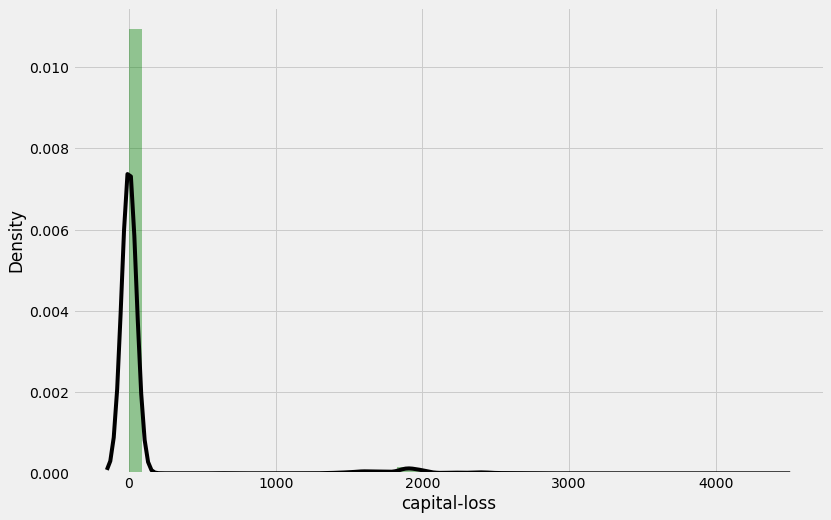

In [34]:
#capital_loss
sns.distplot(df['capital-loss'],color='g', kde_kws={"color": "k"})
print('Minimum',df['capital-loss'].min())
print('Maximum',df['capital-loss'].max())

Minimum capital loss is 0 while the range goes on above 4000 but
most of the people are with the loss of 1000. There is also a 
slight peak seen near 2000. 
Data is highly skewed with a long tail to the right side.

Minimum 1
Maximum 99


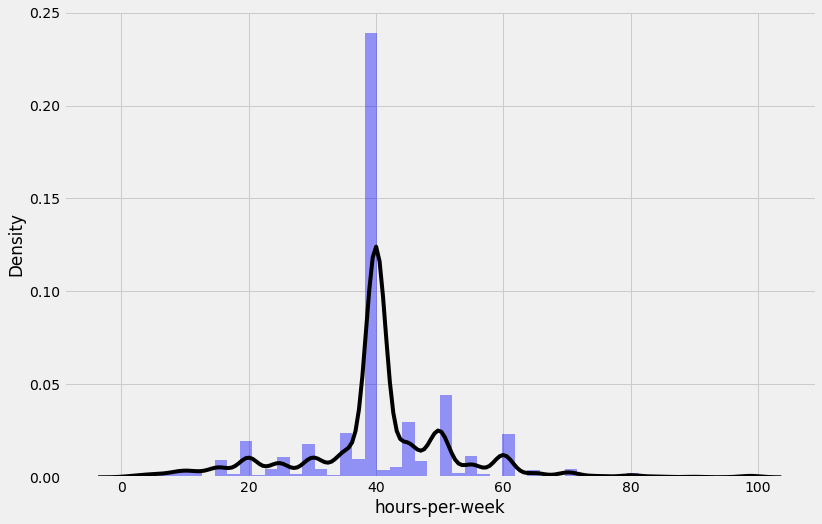

In [35]:
#hours-per-week
sns.distplot(df['hours-per-week'],color='b', kde_kws={"color": "k"})
print('Minimum',df['hours-per-week'].min())
print('Maximum',df['hours-per-week'].max())

Most of the people work 40 hours a day where there is a high 
chance that they belong to private sector. There are people 
working as low ass 1 hour a week and as high as 99 hours a week
which undoubtfully might belong from the armed forces. Data shows
less skewness compared to the other features in the dataframe.

**comparing all features with salary**

<AxesSubplot:xlabel='salary', ylabel='age'>

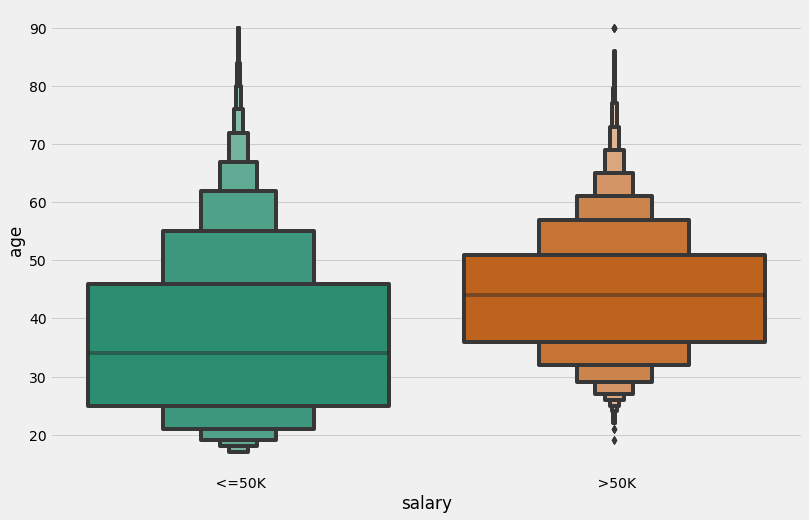

In [36]:
"""AGE VS INCOME
The grapghs shows people belonging to diff countries have less chances of earning >50k which is wrong, 
this is because no. of individuals belonging from other countries other than U.S are very low nut it is to be noticed that there are more people in the category <=50k than >50k.
"""
sns.boxenplot(x='salary',y='age',data=df,palette="Dark2")


People with higher mean age earn >50k while there are individuals earning <=50k even wat very high age.

<AxesSubplot:xlabel='salary', ylabel='fnlwgt'>

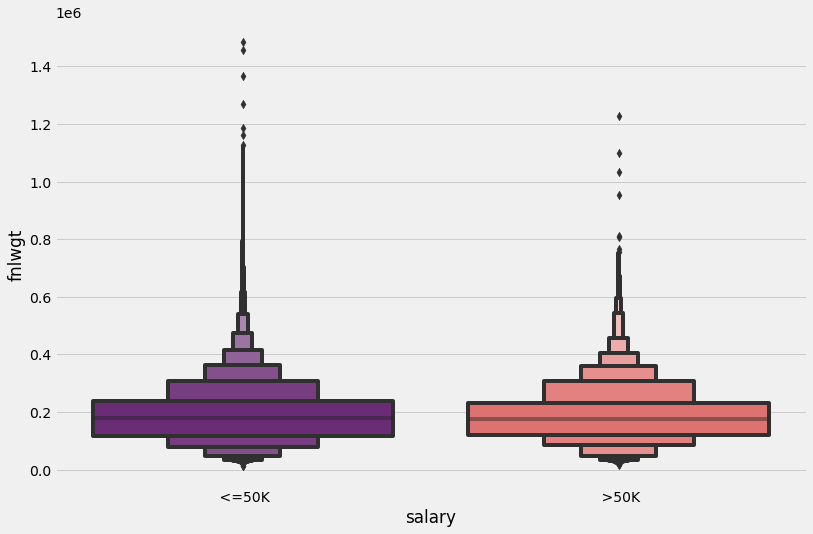

In [37]:
sns.boxenplot(x='salary',y='fnlwgt',data=df,palette="magma")

People are equally divided with respect to fnlwgt in the income
category while it is seen that as the fnlwt is 
high indiduals fall into <=50k income category.

<AxesSubplot:xlabel='salary', ylabel='capital-gain'>

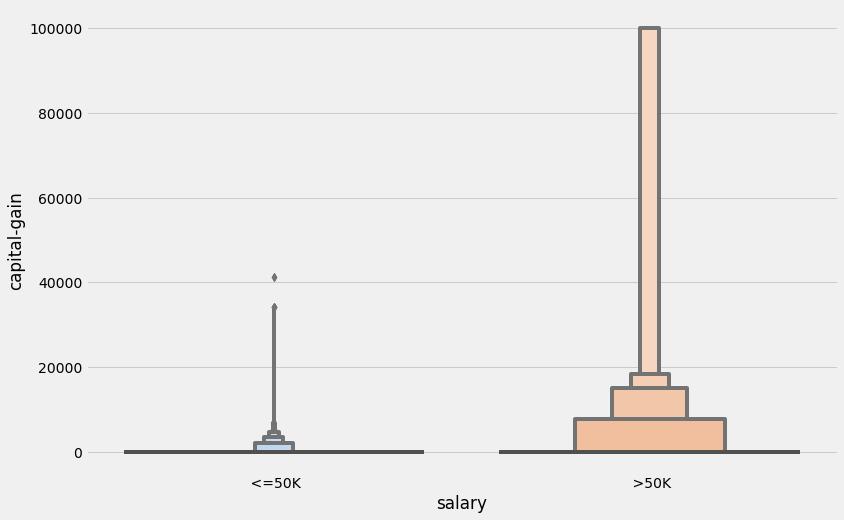

In [38]:
sns.boxenplot(x='salary',y='capital-gain',data=df,palette="pastel")

As the capital gain increases more people fall into >50k salary 
while mean of both categories remain cloase to zero capital.gain

<AxesSubplot:xlabel='salary', ylabel='capital-loss'>

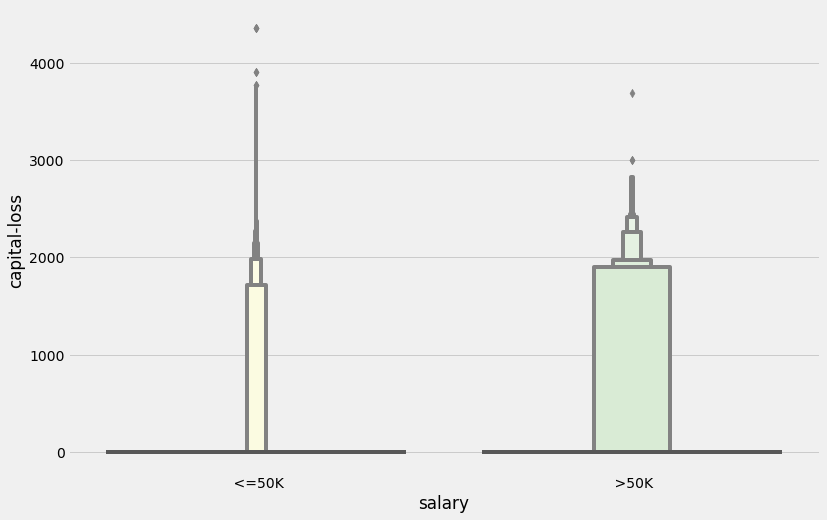

In [39]:
sns.boxenplot(x='salary',y='capital-loss',data=df,palette="Pastel1_r")

There is more density in the >50k income category with increase in capital loss 
while mean of both categories remain cloase to zero capital-gain

<AxesSubplot:xlabel='salary', ylabel='hours-per-week'>

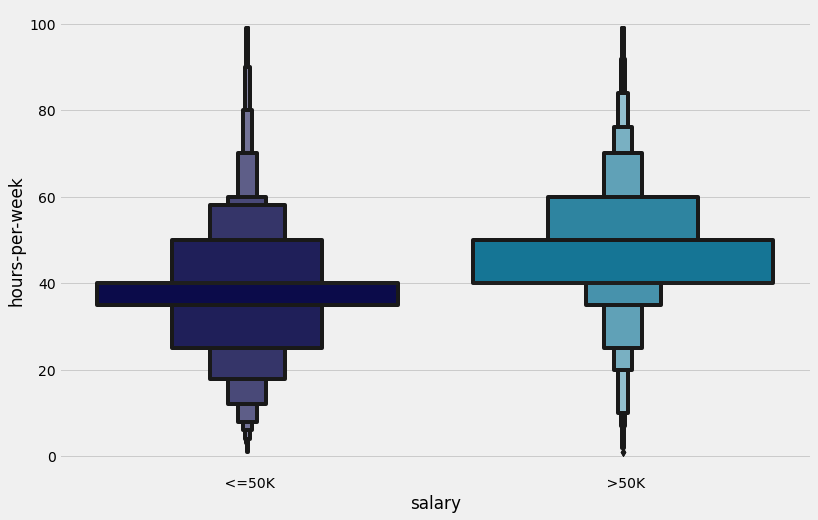

In [40]:
sns.boxenplot(x='salary',y='hours-per-week',data=df,palette="ocean")

People earning >50K income work mean hours per week greater than
tose earning <50K while people from both the categories work 
from min to max hours per week.

**Age VS Categorical columns**

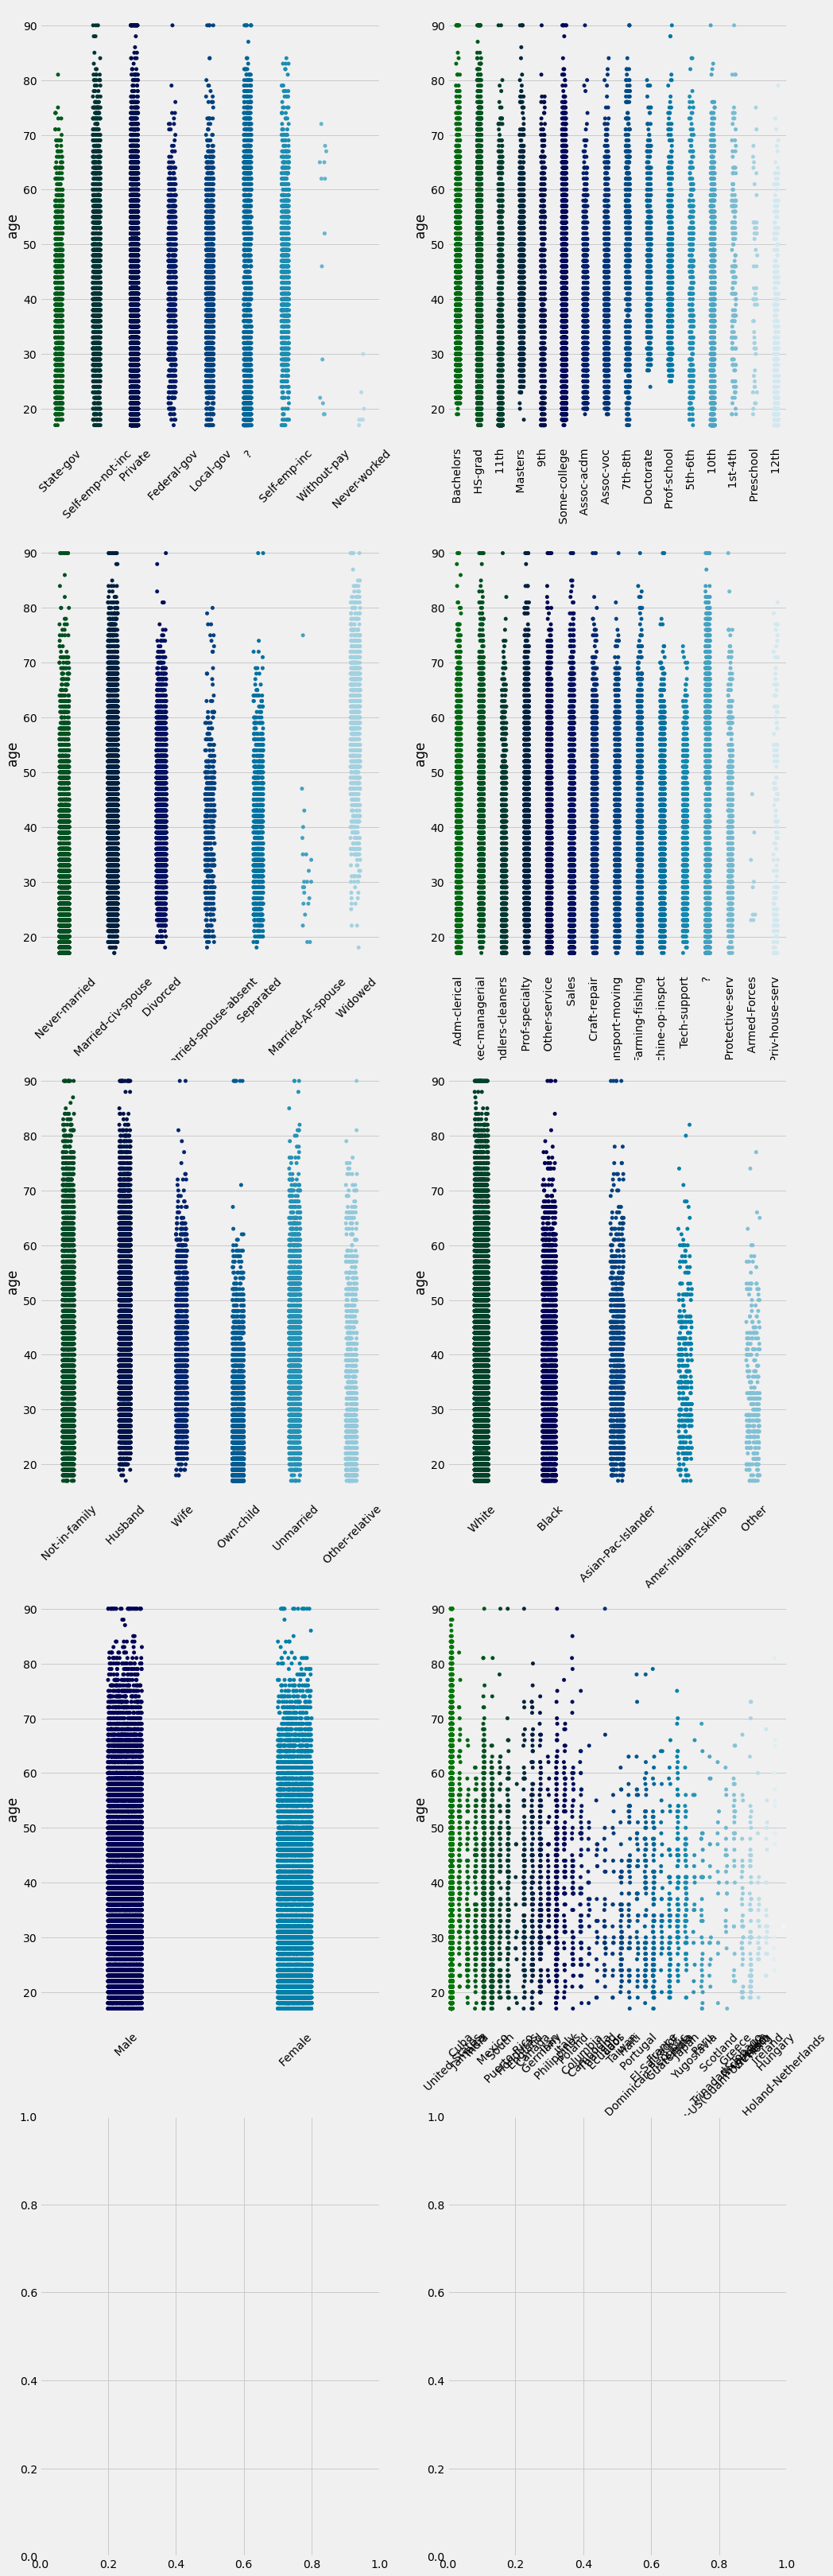

In [41]:
fig,ax=plt.subplots(5,2,figsize=(15,55))
r=0
c=0
for i,n in enumerate(cat_cols):
    if i%2==0 and i>0:
        r+=1
        c=0
    graph=sns.stripplot(x=n,y='age',data=df,ax=ax[r,c], palette = 'ocean')
    if n=='native-country' or n=='occupation' or n=='education':
        graph.set_xticklabels(graph.get_xticklabels(),rotation = 90)
    else:
        graph.set_xticklabels(graph.get_xticklabels(),rotation = 45)
    if n!='education-num':
         graph.set(xlabel=None)
    c+=1

Individuals working in the government secctor have atmost age 70
to 80 with few outliers which must be the retirement age for them.
There are no individuals who do not work after age of 30. There
are no individuals of age >70 belonging to the pre school 
education category while Doctorates and proffessors appear from 
late 20's as they have to study for more years to get to that 
level of education. Same is the case with education num, as the 
education number increases age also is increased. There are no 
people after the age of 50 in the married to armed forces 
category with just a few outliers. Widowed category has seen 
increase as the age age seem to increase, there are very few 
widows at an early age. There are less people with high age
from other races than the white race. There are more no. of 
working men at higher age than women. There 
are very few people belonging from other countries with high age.

**Hours per week VS Categorical columns**

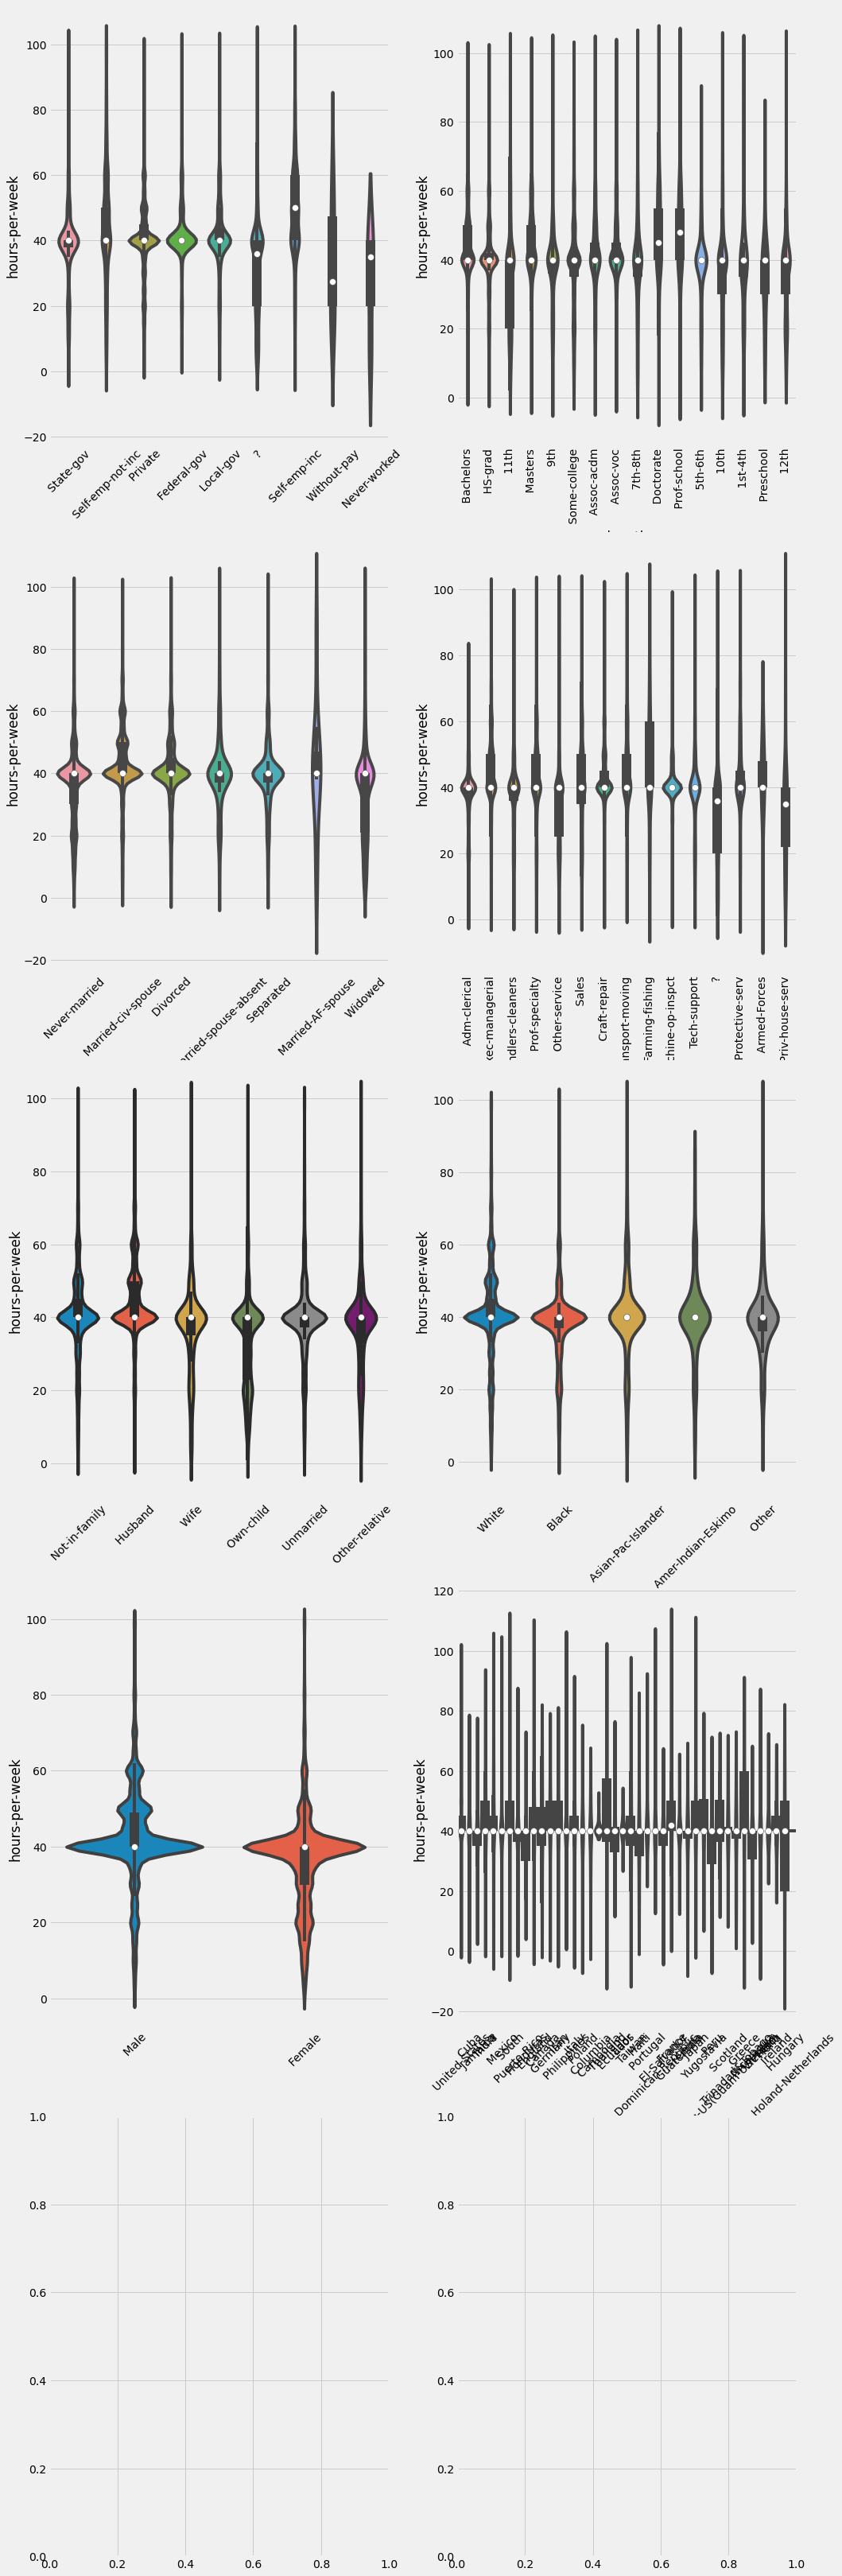

In [42]:
fig,ax=plt.subplots(5,2,figsize=(15,55))
r=0
c=0
for i,n in enumerate(cat_cols):
    if i%2==0 and i>0:
        r+=1
        c=0
    graph=sns.violinplot(x=n,y='hours-per-week',data=df,ax=ax[r,c])
    if n=='native-country' or n=='occupation' or n=='education':
        graph.set_xticklabels(graph.get_xticklabels(),rotation = 90)
    else:
        graph.set_xticklabels(graph.get_xticklabels(),rotation = 45)
        if n!='education-num':
            graph.set(xlabel=None)
        c+=1

Govt employees do not work more than 80 hours a week that also 
with rare cases. It is seen that people with less education worl
more no. hours of the week which is quite logical. No armed 
force person works more than 60 hours a week while farmers and
transport movers has working hours mean higher than other 
occupation. More no, of individuals who have relationship as own
child have high density for working only 20 hous 
a week. Female works for less no. of hours as compared to men.

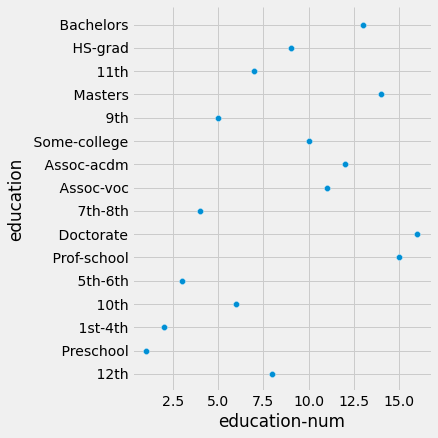

In [43]:
#Let us take a look at education-num and education as these variables are largely similar in nature

sns.relplot(x="education-num", y="education",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df)

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

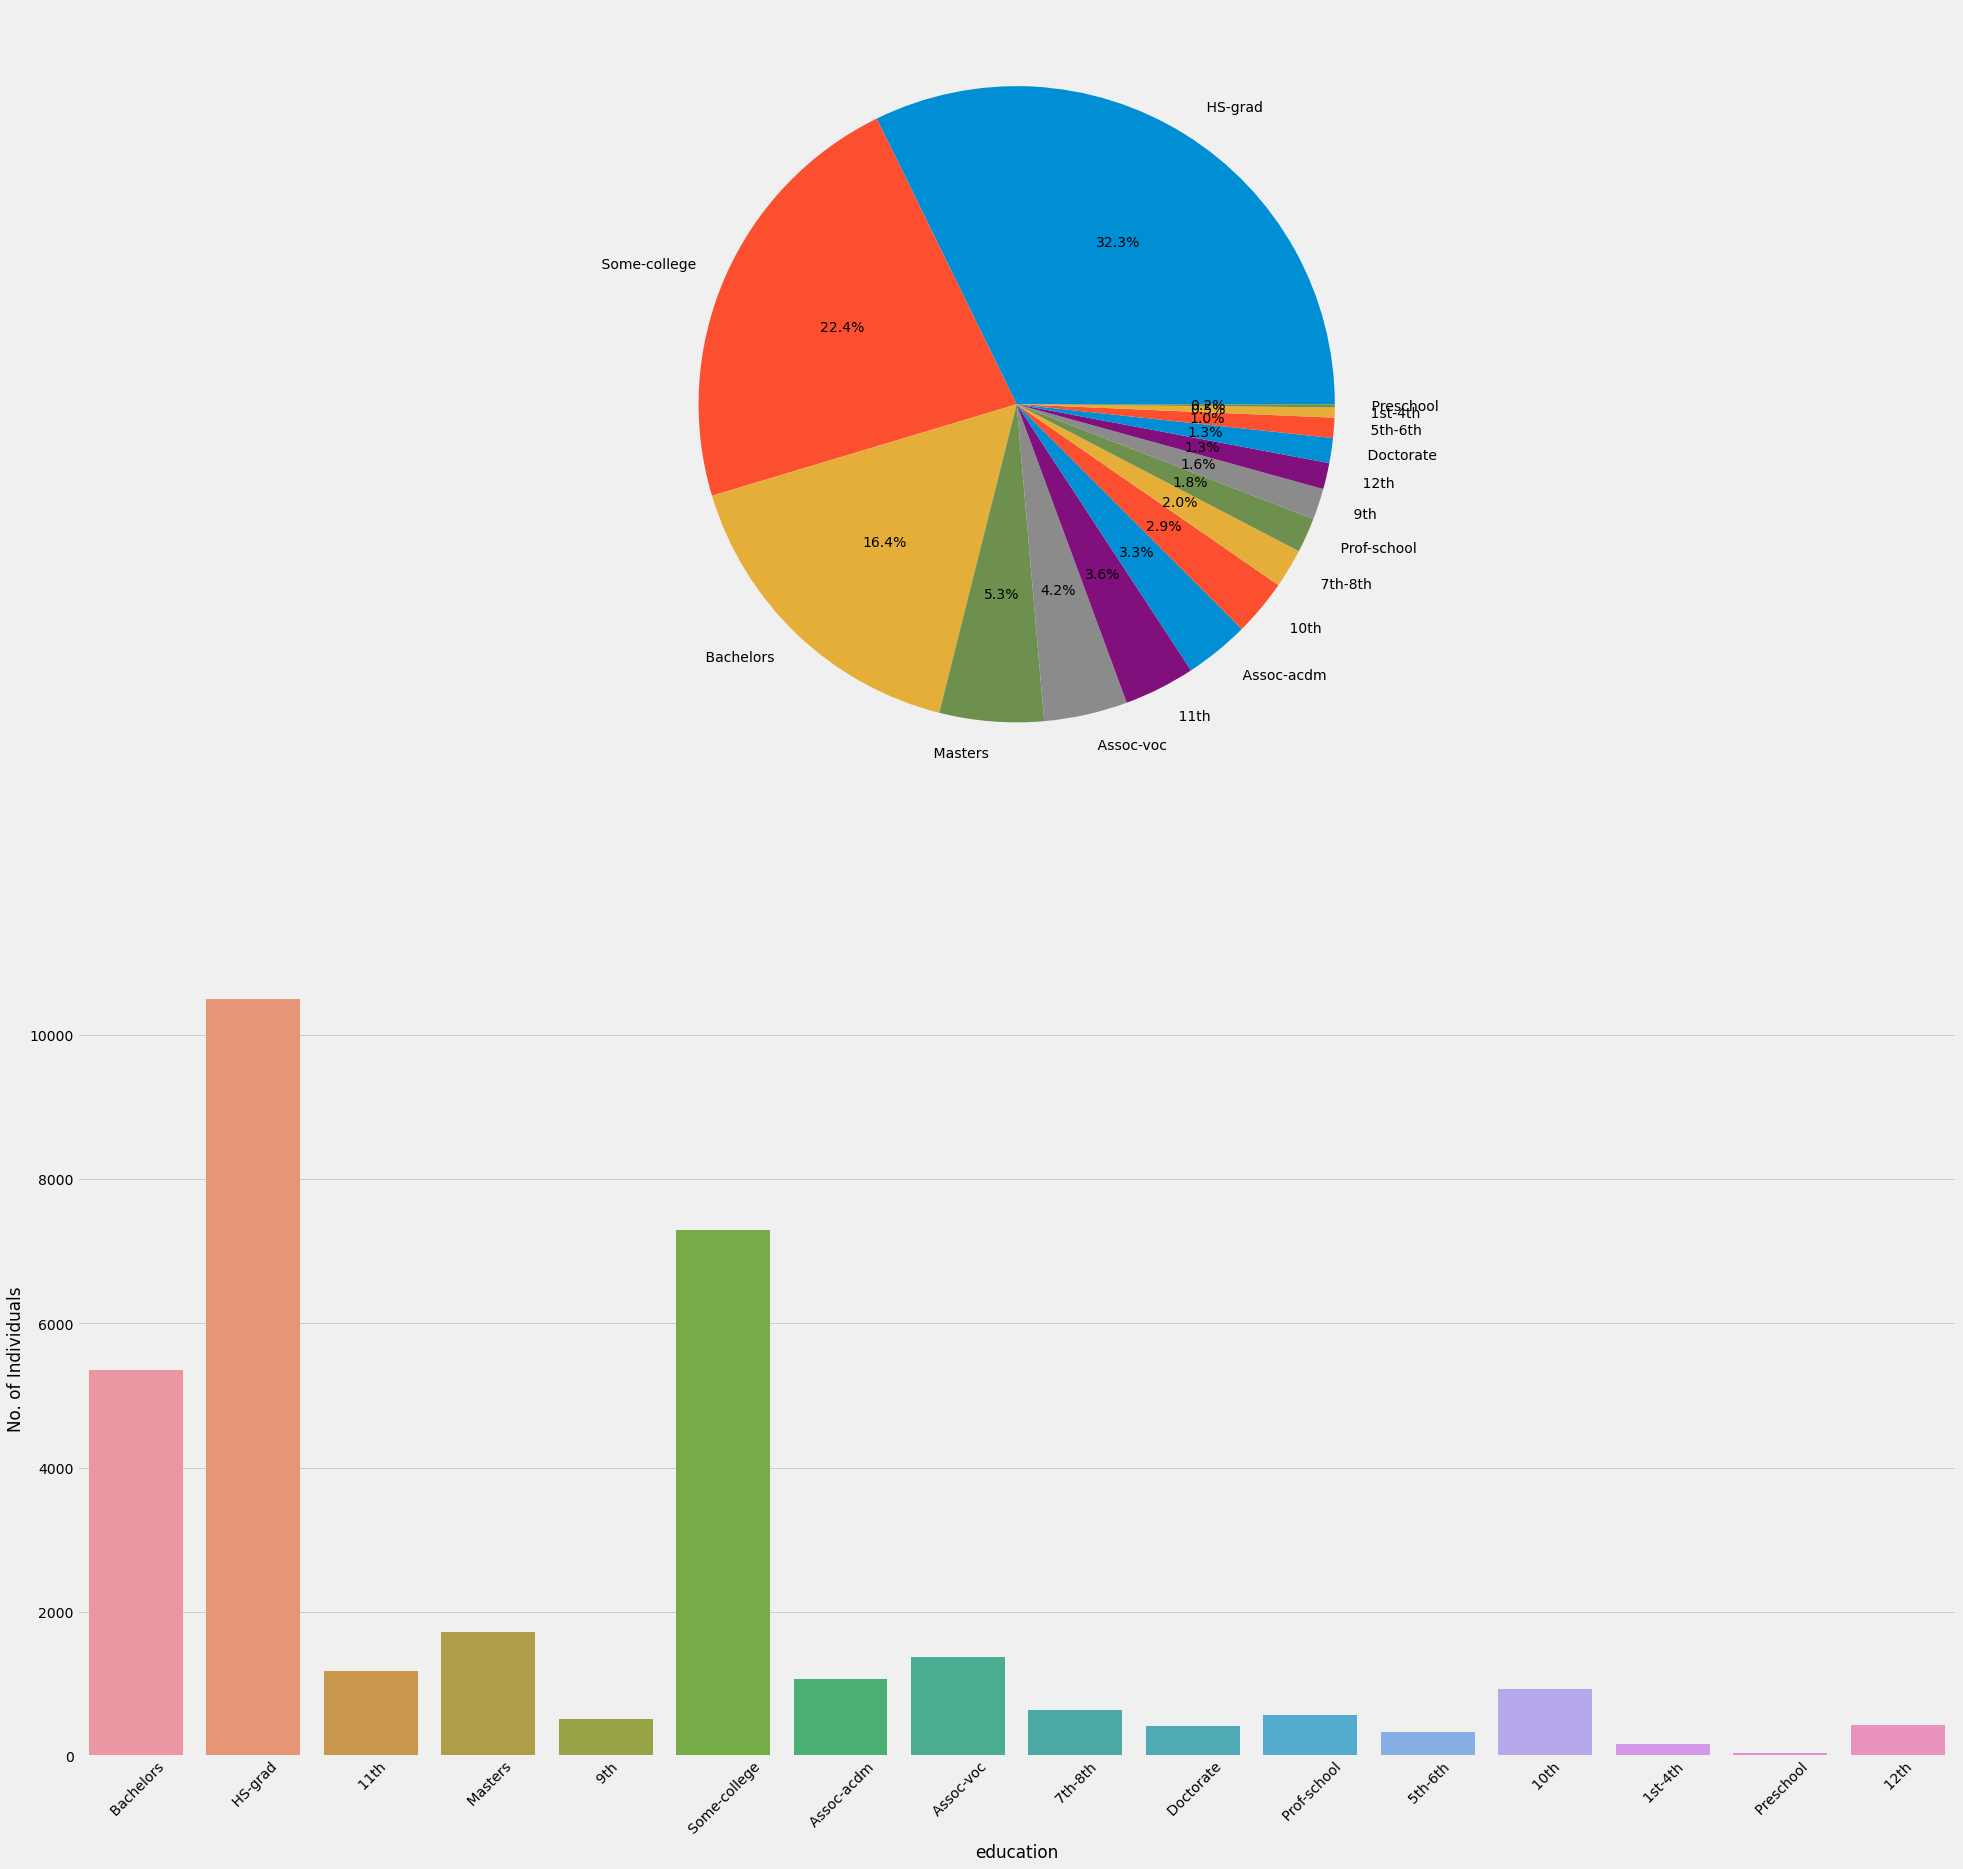

In [45]:
plt.figure(figsize=(30,30))
plt.subplot(2,1,1)
df['education'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.subplot(2,1,2)
sns.countplot(x='education',data=df)
plt.xticks(rotation=45)
plt.ylabel('No. of Individuals')
df['education'].value_counts()

There are 9 workclass in total including Never worked and one unknown category(?).
Most individuals work in private sector and there are very few who have never worked or work without pay. There are 3 categories of govt job provided state, federal and local among which no. of people working in the local govt is highest.

**Multivariate analysis**

Text(0, 0.5, 'Average age')

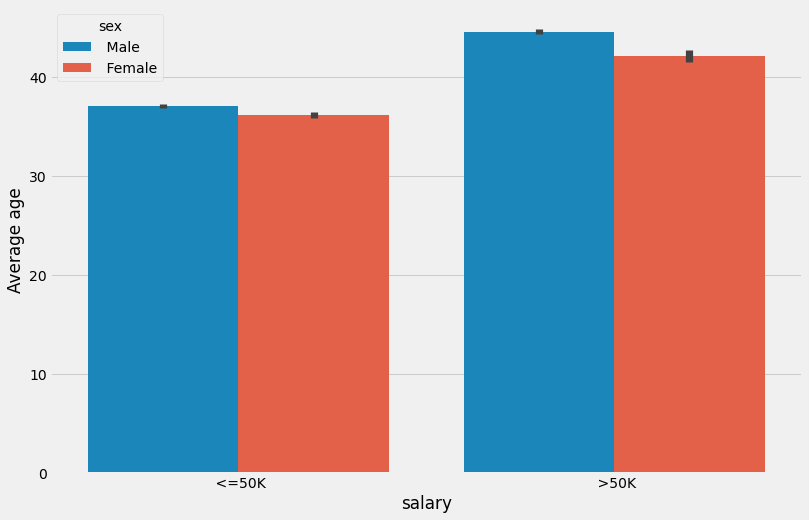

In [48]:
sns.barplot(x='salary',y='age',hue='sex',data=df)
plt.ylabel('Average age')

As the age increases people are paid more but males are paid more than females.

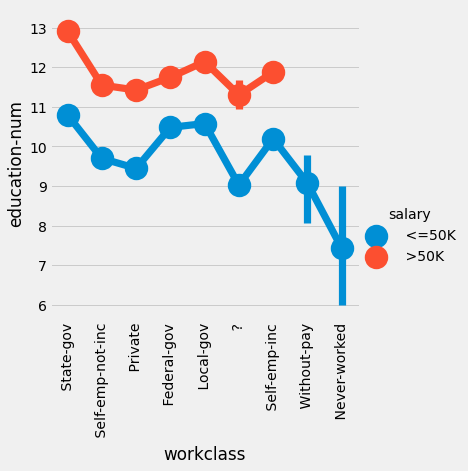

In [50]:
sns.factorplot(x='workclass',y='education-num',hue='salary',data=df)
plt.xticks(rotation=90);

Some people belonging to a particular workclass might have less
education and some workclass might require more education level,
but no matter whatever workclass, people in the same workclass, 
if they have higher education level they earn more. It is also
to be noticed that there is no person from without pay and never 
worked workclass category who earn more than 50k which is logical.

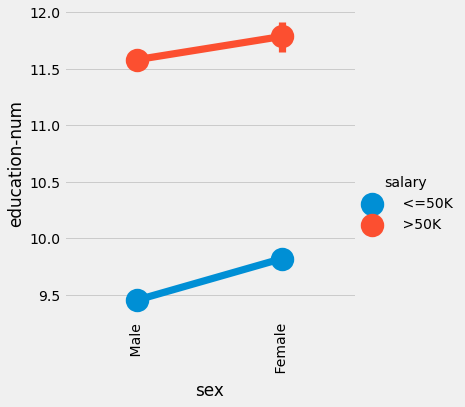

In [51]:
sns.factorplot(x='sex',y='education-num',hue='salary',data=df,)
plt.xticks(rotation=90);

Females with higher education level earn equal to men having less education level than them irrespective of any income category they fall.


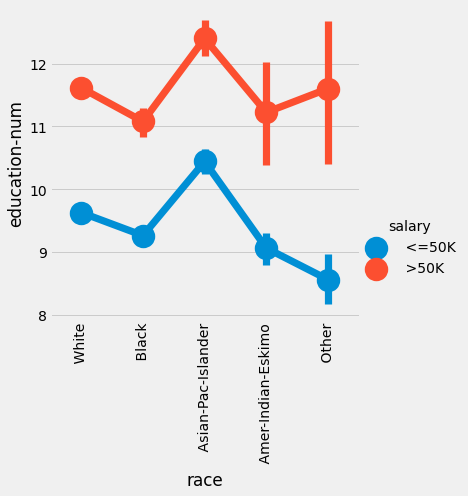

In [53]:
sns.factorplot(x='race',y='education-num',hue='salary',data=df)
plt.xticks(rotation=90);

Asian pacific race have comparatively more education than the 
fellows who earn same as much as they do, belonging to other 
races. Indians 
and some other races earn >50k with lowest education level.

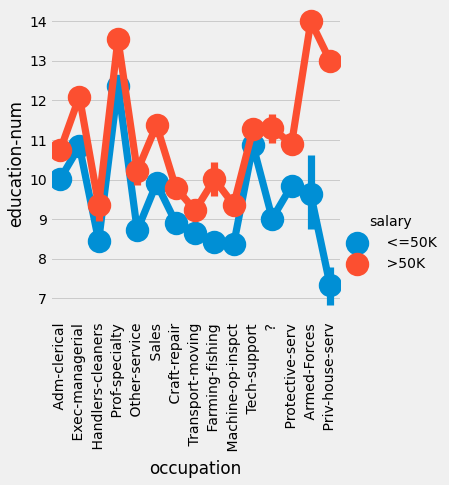

In [55]:
sns.factorplot(x='occupation',y='education-num',hue='salary',data=df, opacity=.6)
plt.xticks(rotation=90);

People with highest education level belong to armed forces, 
but people with even education level quite low, who belong to
handlers cleaners, transport moving occupation earn as much as
they do. Same is the case with prof speciality. occupation of 
private house service who earn >50k and <50k have the highest 
education level difference while prof speciality have the minimum 
difference.